## 목차
1. 데이터 준비  
    [1-1. 라이브러리 불러오기](#라이브러리-불러오기)  
    [1-2. 데이터 불러오기](#데이터-불러오기--전처리)  
2. 가설 검증
    [2-1. 노쇼 수 가설 검증](#가설--특정-시간대요일에-노쇼-물품이-많을-것이다)

# 라이브러리 불러오기

In [17]:
import pickle
import pandas as pd
import os
import openai
import json
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기 & 전처리

In [18]:
df = pd.read_excel("C:/Users/sera/Desktop/노쇼핑_git/noshow_analyze/data/호텔_results_20241010_104347.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   platform              1444 non-null   object        
 1   original_link         1444 non-null   object        
 2   post_time             1444 non-null   datetime64[ns]
 3   title                 1444 non-null   object        
 4   view_count            1444 non-null   int64         
 5   like_count            1444 non-null   int64         
 6   price                 1444 non-null   int64         
 7   images                1440 non-null   object        
 8   description           1430 non-null   object        
 9   category              455 non-null    object        
 10  status                1444 non-null   object        
 11  seller_location       338 non-null    object        
 12  expiration_date       0 non-null      float64       
 13  market_price      

In [3]:
# 피클 파일 경로
file_path = 'data/filter_df.pickle'
# 피클 파일 불러오기
with open(file_path, 'rb') as file:
    df = pickle.load(file)

# 데이터 프레임으로 변환
df = pd.DataFrame(df)
# 광고글 제거
df=df[~df['title'].str.contains('임대|야놀자|입장권|상품권|포인트|야놀|주차권|쿠폰|구매|비행기|종일권|자유이용권', na=False)]
df.info()

FileNotFoundError: [Errno 2] No such file or directory: 'data/filter_df.pickle'

In [22]:
# description 컬럼을 문자열로 변환
df['description'] = df['description'].astype(str)

# 문자열 길이의 평균을 계산
mean_length = df['description'].apply(len).mean()
print(mean_length)

387.2416897506925


In [27]:
df[df['description'].apply(len) <= 20]

,platform,original_link,post_time,title,view_count,like_count,price,images,description,category,...,seller_location,expiration_date,market_price,capacity,parking,options,check_in_out_time,shipping_fee,transaction_location,transaction_method
20,당근마켓,https://www.daangn.com/articles/845799591,2024-10-10 08:36:01.753,사용하는 게 있어서요 호텔식 구스이불 새거에요,204,9,80000,https://img.kr.gcp-karroter.net/origin/article...,양면 화이트\n사계절용\n크기 퀸사이즈,생활/주방,...,경산시 자인면,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,당근마켓,https://www.daangn.com/articles/845790555,2024-10-10 07:36:01.753,안다즈 파크하얏트 알릴라 하얏트호텔 바디 타올 샤워 스크럽,28,0,500,https://img.kr.gcp-karroter.net/origin/article...,개당 가격이고 15개 있습니다,기타 중고물품,...,강남구 논현동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,당근마켓,https://www.daangn.com/articles/845787335,2024-10-10 07:36:01.753,고급 호텔 슬리퍼 5세트,103,2,3500,https://img.kr.gcp-karroter.net/origin/article...,gs25월배아이파크점 앞 직거래,기타 중고물품,...,달서구 유천동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,당근마켓,https://www.daangn.com/articles/845784948,2024-10-10 07:36:01.753,일회용 슬리퍼(인터불고호텔),30,0,2000,https://img.kr.gcp-karroter.net/origin/article...,일회용 슬리퍼(인터불고호텔),생활/주방,...,남구 봉덕3동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,당근마켓,https://www.daangn.com/articles/845770317,2024-10-10 02:36:01.753,호텔실내슬리퍼,54,1,8000,https://img.kr.gcp-karroter.net/origin/article...,실내슬리퍼\n새상품,여성잡화,...,서초구 반포본동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,당근마켓,https://www.daangn.com/articles/845769999,2024-10-10 02:36:01.753,신라호텔목욕용품,131,1,5000,https://img.kr.gcp-karroter.net/origin/article...,새상품,기타 중고물품,...,서초구 반포본동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,당근마켓,https://www.daangn.com/articles/845755991,2024-10-10 00:36:01.753,호텔세리토스 새모자 팔아요,15,0,35000,https://img.kr.gcp-karroter.net/origin/article...,호텔세리토스 새모자 팔아요,여성잡화,...,청주시 흥덕구 복대1동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,당근마켓,https://www.daangn.com/articles/845750577,2024-10-10 00:36:01.753,달리호텔 머메이드 원피스,66,2,18000,https://img.kr.gcp-karroter.net/origin/article...,미착용 상품\n55-66,여성의류,...,해운대구 좌제1동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,당근마켓,https://www.daangn.com/articles/845715634,2024-10-09 22:36:01.754,포시즌스 호텔 불독 인형,19,0,20000,https://img.kr.gcp-karroter.net/origin/article...,포시즌스 호텔 불독 인형,기타 중고물품,...,마포구 상암동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,당근마켓,https://www.daangn.com/articles/845589477,2024-10-09 19:36:01.754,2x2.3m 힐튼호텔이불입니다 따뜻해요,218,6,53000,https://img.kr.gcp-karroter.net/origin/article...,프리미엄웰론 소재입니다\n새거에요,가구/인테리어,...,진천군 덕산읍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 가설 : 특정 시간대/요일에 노쇼 물품이 많을 것이다.

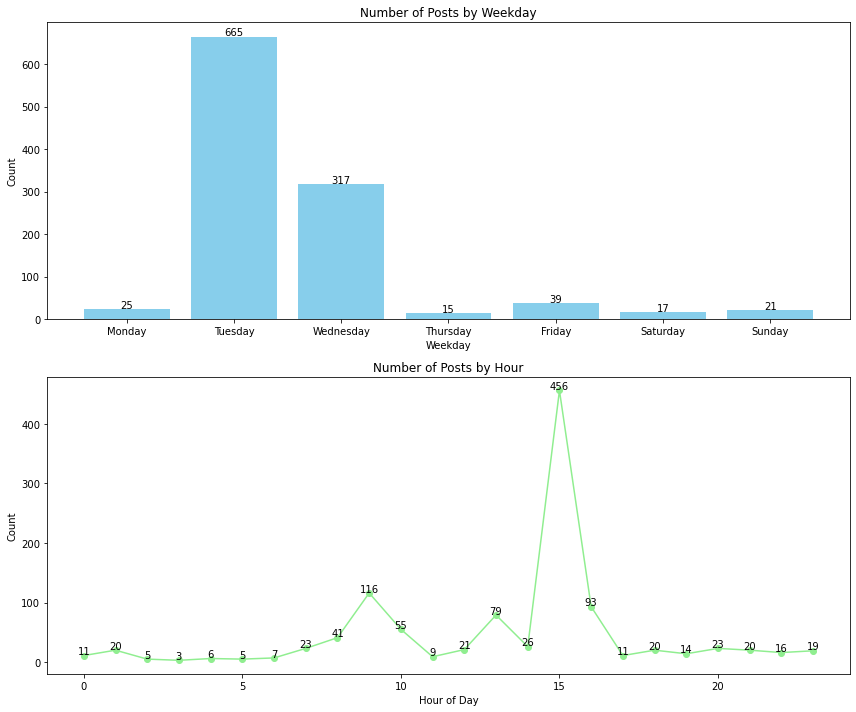

In [12]:
# 'post_time'에서 요일과 시간 추출
df['post_time'] = pd.to_datetime(df['post_time'])
df['weekday'] = df['post_time'].dt.day_name()  # 요일 이름
df['hour'] = df['post_time'].dt.hour  # 시간 (0-23)

# 요일 순서 설정
ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['weekday'], categories=ordered_weekdays, ordered=True)

# 요일별 갯수 집계
weekday_counts = df['weekday'].value_counts().sort_index()

# 시간대별 갯수 집계
hour_counts = df['hour'].value_counts().sort_index()

# 그래프 설정
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# 요일별 갯수 시각화 (막대 그래프)
axs[0].bar(weekday_counts.index, weekday_counts.values, color='skyblue')
axs[0].set_title('Number of Posts by Weekday')
axs[0].set_xlabel('Weekday')
axs[0].set_ylabel('Count')

# 개수 표시
for i, count in enumerate(weekday_counts):
    axs[0].text(i, count + 2, str(count), ha='center', fontsize=10)

# 시간대별 갯수 시각화 (선 그래프)
axs[1].plot(hour_counts.index, hour_counts.values, marker='o', color='lightgreen')
axs[1].set_title('Number of Posts by Hour')
axs[1].set_xlabel('Hour of Day')
axs[1].set_ylabel('Count')

# 개수 표시
for i, count in enumerate(hour_counts):
    axs[1].text(i, count + 2, str(count), ha='center', fontsize=10)

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.show()